# Build the DNA methylation data frame

Here we build the dataframe and also add in any patient information. 

We filter out poor quality samples and also create teh dataset for differential analysis.

In [54]:
import os
import pandas as pd
from collections import defaultdict
from multiprocessing.dummy import Pool as ThreadPool
base_dir = '../data/'
data_dir = f'{base_dir}raw_downloads/CPTAC/Methylation_hg38_v1.0_20180809/' # Data downloaded from CPTAC
output_dir = f'{base_dir}sircle/F1_DE_input_TvN/'
fig_dir = '../figures/'
supp_dir = f'{base_dir}raw_downloads/supps/'
gene_name = 'hgnc_symbol'
save_fig = False


## Had issues with the downloaded merged methylation file, so downloaded the unmerged files

In [2]:
from sciutil import SciUtil
u = SciUtil()
u.dp(['Running multiprocessing...'])

--------------------------------------------------------------------------------
                          Running multiprocessing...	                           
--------------------------------------------------------------------------------


In [6]:
files

['C3N_00314.T.csv.gz',
 'C3N_00315.T.csv.gz',
 'C3N_01220.T.csv.gz',
 'C3N_01361.T.csv.gz',
 'C3L_01557.T.csv.gz',
 'C3L_01281.T.csv.gz',
 'C3L_00817.T.csv.gz',
 'C3N_00852.T.csv.gz',
 'C3L_01607.T.csv.gz',
 'C3L_01352.T.csv.gz',
 'C3L_00561.T.csv.gz',
 'C3L_00103.T.csv.gz',
 'C3N_00320.T.csv.gz',
 'C3N_01214.T.csv.gz',
 'C3N_01648.T.csv.gz',
 'C3N_01649.T.csv.gz',
 'C3N_00242.T.csv.gz',
 'C3N_00832.T.csv.gz',
 'C3N_00390.T.csv.gz',
 'C3L_00800.T.csv.gz',
 'C3L_00908.T.csv.gz',
 'C3L_00902.T.csv.gz',
 'C3L_01836.T.csv.gz',
 'Manifest.txt',
 'C3N_00150.T.csv.gz',
 'C3L_00766.T.csv.gz',
 'C3N_00577.T.csv.gz',
 'C3N_00244.T.csv.gz',
 'C3N_00834.T.csv.gz',
 'C3N_00305.T.csv.gz',
 'C3N_01808.T.csv.gz',
 'C3N_00437.T.csv.gz',
 'C3L_00011.T.csv.gz',
 'C3L_00010.T.csv.gz',
 'C3N_00168.T.csv.gz',
 'C3N_00491.T.csv.gz',
 'C3L_00088.T.csv.gz',
 'C3L_00447.T.csv.gz',
 'C3N_00313.T.csv.gz',
 'C3N_00312.T.csv.gz',
 'C3N_00646.T.csv.gz',
 'C3N_00380.T.csv.gz',
 'C3L_00088.N.csv.gz',
 'C3L_00799.T.csv

In [13]:
#"Locus","Beta","chr","pos","strand","Name","Probe_rs","Probe_maf","CpG_rs","CpG_maf","SBE_rs","SBE_maf","Islands_Name","Relation_to_Island","UCSC_RefGene_Group","Phantom4_Enhancers","Phantom5_Enhancers","DMR","X450k_Enhancer","HMM_Island","Regulatory_Feature_Name","Regulatory_Feature_Group","GencodeBasicV12_NAME","GencodeBasicV12_Accession","GencodeBasicV12_Group","GencodeCompV12_NAME","GencodeCompV12_Accession","GencodeCompV12_Group","DNase_Hypersensitivity_NAME","DNase_Hypersensitivity_Evidence_Count","OpenChromatin_NAME","OpenChromatin_Evidence_Count","TFBS_NAME","TFBS_Evidence_Count","Methyl27_Loci","Methyl450_Loci","Random_Loci"
#"cg00000029",0.698308967012916,"chr16",53434200,"+","cg00000029",NA,NA,NA,NA,NA,NA,"chr16:53434372-53435297","N_Shore","TSS1500",NA,NA,"",NA,NA,"16:53433926-53435773","Promoter_Associated","RBL2","ENST00000262133.6","TSS1500","RBL2;RBL2;RBL2;RBL2","ENST00000262133.6;ENST00000567964.1;ENST00000544405.2;ENST00000567964.1","TSS1500;1stExon;TSS1500;5'UTR","chr16:53434093-53434558",3,NA,NA,NA,NA,NA,TRUE,NA
sample_df = pd.DataFrame()
case_ids = []
condition_labels = []
condition_ids = []
sample_id = []
first = True
cpg_df = pd.DataFrame()
files = list(os.listdir(f'{data_dir}'))
# We want to make a sample DF and also merge the reils together 
for f in files:
    try:
        if 'Manifest' not in f and 'Processing' not in f:
            tmp_f = pd.read_csv(f'{data_dir}{f}')
            tumour_state = "Tumor" if f.split('.')[1] == "T" else "Normal"
            case_id = f.split('.')[0].replace("_", '-')
            cond_id = 1 if tumour_state == "Tumor" else 0
            new_name = f'{case_id}_{tumour_state}'
            case_ids.append(case_id)
            condition_labels.append(tumour_state)
            condition_ids.append(cond_id)
            sample_id.append(new_name)
            # Now we want to add to the df
            if first:
                for c in tmp_f.columns:
                    if c != 'Beta':
                        cpg_df[c] = tmp_f[c].values
                first = False
            cpg_df[new_name] = tmp_f['Beta'].values
            u.dp([f])
    except:
        print(f)
# Run in paralell        
# pool = ThreadPool(20)
# results = pool.map(run_multi, files)


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8,10,15,17,19,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


--------------------------------------------------------------------------------
                              C3N_00314.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_00315.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_01220.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_01361.T.csv.gz	                               
--------------------------------------------------------------------------------
----------------------------

--------------------------------------------------------------------------------
                              C3L_00011.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3L_00010.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_00168.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_00491.T.csv.gz	                               
--------------------------------------------------------------------------------
----------------------------

--------------------------------------------------------------------------------
                              C3L_00448.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_01261.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3L_00359.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3L_00796.T.csv.gz	                               
--------------------------------------------------------------------------------
----------------------------

--------------------------------------------------------------------------------
                              C3L_01553.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_00148.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3N_00149.T.csv.gz	                               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                              C3L_00812.T.csv.gz	                               
--------------------------------------------------------------------------------
----------------------------

## Methylation summary from the supplementary files of CPATC:

Supplemental table 1 info shows there are no normal samples, but there are some 
Table: Sample size of different data sets after excluding samples with low quality.			

```
| CCRCC-tumor     | CCRCC-NAT* | Non-CCRCC tumor | Non-CCRCC NAT |    |
|-----------------|------------|-----------------|---------------|----|
| Protein/phospho | 103        | 80              | 7             | 3  |
| CNV/Mutation    | 103        | 80              | 7             | 3  |
| RNA             | 103        | 72              | 7             | 2  |
| Methylation     | 100**      | NA              | 7             | NA |

```

In [14]:
import os
import pandas as pd
from collections import defaultdict

files = os.listdir(f'{data_dir}')

#"Locus","Beta","chr","pos","strand","Name","Probe_rs","Probe_maf","CpG_rs","CpG_maf","SBE_rs","SBE_maf","Islands_Name","Relation_to_Island","UCSC_RefGene_Group","Phantom4_Enhancers","Phantom5_Enhancers","DMR","X450k_Enhancer","HMM_Island","Regulatory_Feature_Name","Regulatory_Feature_Group","GencodeBasicV12_NAME","GencodeBasicV12_Accession","GencodeBasicV12_Group","GencodeCompV12_NAME","GencodeCompV12_Accession","GencodeCompV12_Group","DNase_Hypersensitivity_NAME","DNase_Hypersensitivity_Evidence_Count","OpenChromatin_NAME","OpenChromatin_Evidence_Count","TFBS_NAME","TFBS_Evidence_Count","Methyl27_Loci","Methyl450_Loci","Random_Loci"
#"cg00000029",0.698308967012916,"chr16",53434200,"+","cg00000029",NA,NA,NA,NA,NA,NA,"chr16:53434372-53435297","N_Shore","TSS1500",NA,NA,"",NA,NA,"16:53433926-53435773","Promoter_Associated","RBL2","ENST00000262133.6","TSS1500","RBL2;RBL2;RBL2;RBL2","ENST00000262133.6;ENST00000567964.1;ENST00000544405.2;ENST00000567964.1","TSS1500;1stExon;TSS1500;5'UTR","chr16:53434093-53434558",3,NA,NA,NA,NA,NA,TRUE,NA
n_c = 0
t_c = 0
# We want to make a sample DF and also merge the reils together 
for f in files:
    try:
        t = f.split('.')[1]
        if t == 'N':
            n_c += 1
        elif t == 'T':
            t_c += 1
    except:
        print(f)
print(n_c, t_c)

8 110


## Add in sample information

Here we get the cases from the methylation and find out the different attributes of the patients

In [15]:
cases = [c.split('.')[0].replace('_', '-') for c in files]
conds = ['Tumor' if c.split('.')[1] == 'T' else 'Not_ccRCC' for c in files]
# Read in the sample clinical information
clin_df = pd.read_csv(f'{output_dir}clinical_sircle.csv')

# Create a methylation sample data frame for each of the tumours
sample_df = pd.DataFrame()
sample_df['SampleId'] = [f'{c}_{conds[i]}' for i, c in enumerate(cases)]
sample_df['CondId'] = [1 if c == 'Tumor' else 0 for c in conds]
sample_df['CondName'] = conds
sample_df['CaseId'] = cases
sample_df['SafeCases'] = [c.replace('-', '.') for c in cases]
sample_df['FullLabel'] = sample_df['SampleId'].values
## -------- DNA methylation

new_full_label_map = {}
new_full_label = []
for full_label in sample_df['FullLabel'].values:
    new_label = f'CpG_{full_label.split("_")[1]}_{full_label.split("_")[0].replace("-", ".")}_1'
    new_full_label.append(new_label)
    new_full_label_map[full_label] = new_label
    
sample_df['FullLabel'] = new_full_label
clin_df = pd.read_csv(f'{output_dir}clinical_sircle.csv')
# We want to make a RNAseq clinical dataframe using the case IDs in the labels
sample_df = sample_df.set_index("CaseId").join(clin_df.set_index("case_id"), how="left", rsuffix='_')

sample_df.to_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_sample_df.csv')
sample_df['CondName'].value_counts()

Tumor        110
Not_ccRCC     10
Name: CondName, dtype: int64

## Remove duplicates CpGs

In [16]:
# Have a look at how many are in each region (CpG island, shore etc)
print(cpg_df['Relation_to_Island'].value_counts())

cpg_df = cpg_df.drop_duplicates(subset='Locus') # Remove duplicates from the locus

OpenSea    478827
Island     195866
N_Shore     94323
S_Shore     86237
N_Shelf     32905
S_Shelf     29502
Name: Relation_to_Island, dtype: int64


## Get paired samples and check correlations/PCA between patients



/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


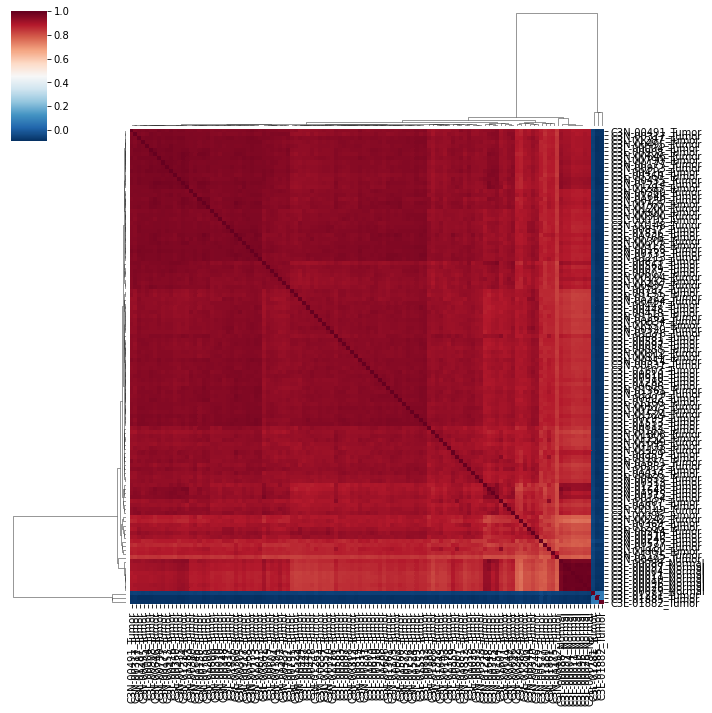

Text(0.5, 1.0, 'min corr: -0.08916083103700168')

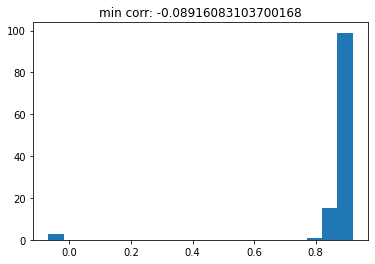

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_cases = [c for c in cpg_df.columns if 'C3' in c]
corr = cpg_df[all_cases].corr()
sns.clustermap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='RdBu_r', row_cluster=True, col_cluster=True)
if save_fig:
    plt.savefig(f'{fig_dir}Heatmap_CpGs.svg')
plt.show()

# Print out the minimum correlation:
mean_cor = np.mean(corr, axis=1)
corr['mean_corr'] = mean_cor
corr.sort_values(by=['mean_corr'])
# Plot out the mean correlation values so we can choose a good filter.
plt.hist(mean_cor, bins=20)
plt.title(f'min corr: {min(np.min(corr))}')

--------------------------------------------------------------------------------
3	patients with avg. correlations less than 75. Filtering out these samples, and printing cases.	
--------------------------------------------------------------------------------
C3L-01885
C3L-01882
C3L-01281
C3L-01885_Tumor
C3L-01882_Tumor
C3L-01281_Tumor


/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


['C3L-01885', 'C3L-01882', 'C3L-01281']


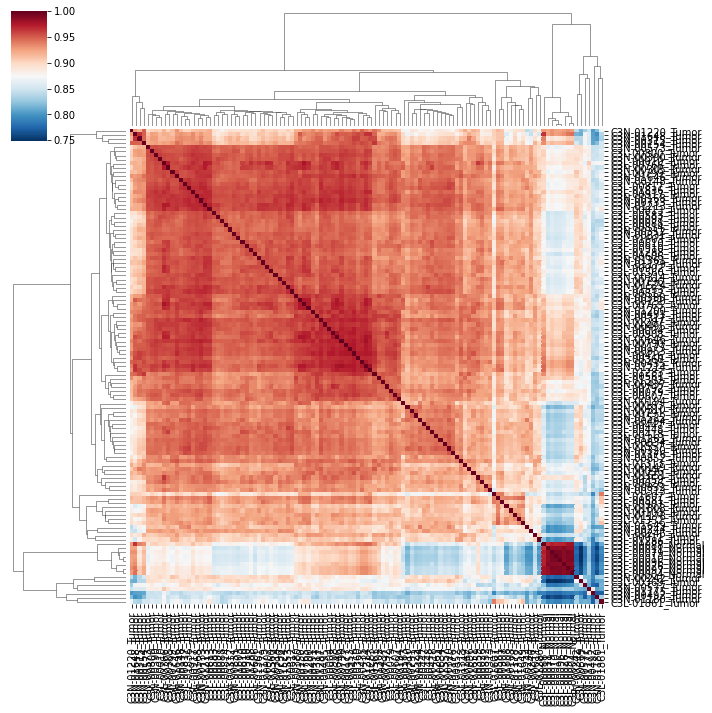

In [18]:
from sciutil import SciUtil
u = SciUtil()

# Actually remove those columns! (But make sure you keep the ID column)
corr_sorted = corr.sort_values(by=['mean_corr'])
corr_sorted = corr_sorted[corr_sorted['mean_corr'] < 0.75]
u.dp([len(corr_sorted), 'patients with avg. correlations less than 75. Filtering out these samples, and printing cases.'])

cols_to_omit = [c for c in corr_sorted.index if 'C3' in c]
case_ids = [c.split('_')[0] for c in corr_sorted.index if 'C3' in c]
print('\n'.join(case_ids))
print('\n'.join(cols_to_omit))
cols_to_keep = [c for c in cpg_df.columns if c not in cols_to_omit]
cpg_filtered = cpg_df[cols_to_keep]

# Fill NAs with 0's
cpg_filtered = cpg_filtered.fillna(0)
value_cols = [c for c in cols_to_keep if 'C3' in c]
#Check what the heatmap looks like again
corr = cpg_filtered[value_cols].corr()
sns.clustermap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='RdBu_r', row_cluster=True, col_cluster=True)
if save_fig:
    plt.savefig(f'{fig_dir}Heatmap_CpG_removed_corr-leq-0.75.svg')

# Case ids to remove
print(case_ids)

In [25]:
# Filter the cpg df
cpg_filtered = cpg_df[[c for c in cpg_df if c not in ['C3L-01885_Tumor', 'C3L-01882_Tumor', 'C3L-01281_Tumor']]]
# We want to just keep part of the annotated information they provide
cpg_filtered_min = cpg_filtered[['Locus', "GencodeCompV12_Accession", "GencodeCompV12_NAME", "GencodeCompV12_Group"]]
cpg_filtered_min = cpg_filtered_min[cpg_filtered_min['GencodeCompV12_NAME'].notnull()]
print(cpg_filtered_min["GencodeCompV12_Group"].value_counts())
cpg_filtered_min

5'UTR                                                                                                              48049
TSS1500                                                                                                            47093
3'UTR                                                                                                              40288
TSS200                                                                                                             24880
5'UTR;5'UTR                                                                                                        22031
                                                                                                                   ...  
5'UTR;1stExon;1stExon;1stExon;5'UTR;TSS200;TSS200;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR                            1
1stExon;1stExon;1stExon;1stExon;1stExon;5'UTR;5'UTR;5'UTR;5'UTR;TSS200;TSS200;TSS200;TSS200;TSS200;TSS200;5'UTR        1
TSS1500;TSS1500;TSS1500;TSS200;3

,Locus,GencodeCompV12_Accession,GencodeCompV12_NAME,GencodeCompV12_Group
0,cg00000029,ENST00000262133.6;ENST00000567964.1;ENST000005...,RBL2;RBL2;RBL2;RBL2,TSS1500;1stExon;TSS1500;5'UTR
1,cg00000109,ENST00000478016.1;ENST00000469491.1,FNDC3B;FNDC3B,5'UTR;5'UTR
2,cg00000155,ENST00000459068.1;ENST00000467558.1;ENST000004...,snoU13;BRAT1;BRAT1;BRAT1,1stExon;3'UTR;3'UTR;5'UTR
3,cg00000158,ENST00000375629.3,IARS,5'UTR
5,cg00000221,ENST00000572321.1,ANKFN1,TSS200
...,...,...,...,...
917631,ch.X.665616F,ENST00000453805.2,USP9X,3'UTR
917637,ch.X.772253F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
917638,ch.X.772254F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
917639,ch.X.798879F,ENST00000496365.1;ENST00000467954.1;ENST000004...,FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1,5'UTR;5'UTR;5'UTR;3'UTR;3'UTR;3'UTR;3'UTR


## Add entrez gene ID and ensembl gene ID for the gene names

In [26]:
annotation_file = f'{supp_dir}hsapiens_gene_ensembl-GRCh38.p13.csv'
annot = pd.read_csv(annotation_file)
# Merge the Hg37 with Hg38
hg37_annot = pd.read_csv(f'{supp_dir}hsapiens_gene_ensembl-GRCh37.p13.csv') # Read in hg37 since that is what
# it appears to be in whilst all the rest are in HG38.
hg37_annot = hg37_annot.merge(annot, on="ensembl_gene_id", how="inner", suffixes=('_hg37', '_hg38'))

# What we want is an ensembl ID mapping for all. basically let's go through and map all the ensembl t ids
enst_to_ensembl_gene_hg38 = dict(zip(hg37_annot['ensembl_transcript_id'], hg37_annot['ensembl_gene_id']))

# Try do a mapping from any possible gene name to ensembl gene ID
hgnc_to_ensembl_gene_hg38 = dict(zip(annot['hgnc_symbol'], annot['ensembl_gene_id']))
gene_name_to_ensembl_gene_hg38 = dict(zip(annot['external_gene_name'], annot['ensembl_gene_id']))
syn_to_ensembl_gene_hg38 = dict(zip(annot['external_synonym'], annot['ensembl_gene_id']))

hgnc37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['hgnc_symbol_hg37'], hg37_annot['ensembl_gene_id']))
gene_name37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['external_gene_name_hg37'], hg37_annot['ensembl_gene_id']))
syn37_to_ensembl_gene_hg38 = dict(zip(hg37_annot['external_synonym_hg37'], hg37_annot['ensembl_gene_id']))

print('Number of hg37 gene names:', len(set(hg37_annot['hgnc_symbol_hg37'].values)))

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of hg37 gene names: 32361


## Annotations can be collapsed, so to map between the hg37 and hg38 we uncollapse

In [27]:
cpg_filtered_min

,Locus,GencodeCompV12_Accession,GencodeCompV12_NAME,GencodeCompV12_Group
0,cg00000029,ENST00000262133.6;ENST00000567964.1;ENST000005...,RBL2;RBL2;RBL2;RBL2,TSS1500;1stExon;TSS1500;5'UTR
1,cg00000109,ENST00000478016.1;ENST00000469491.1,FNDC3B;FNDC3B,5'UTR;5'UTR
2,cg00000155,ENST00000459068.1;ENST00000467558.1;ENST000004...,snoU13;BRAT1;BRAT1;BRAT1,1stExon;3'UTR;3'UTR;5'UTR
3,cg00000158,ENST00000375629.3,IARS,5'UTR
5,cg00000221,ENST00000572321.1,ANKFN1,TSS200
...,...,...,...,...
917631,ch.X.665616F,ENST00000453805.2,USP9X,3'UTR
917637,ch.X.772253F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
917638,ch.X.772254F,ENST00000490869.1;ENST00000456273.1,UBA1;INE1,5'UTR;TSS1500
917639,ch.X.798879F,ENST00000496365.1;ENST00000467954.1;ENST000004...,FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1;FTSJ1,5'UTR;5'UTR;5'UTR;3'UTR;3'UTR;3'UTR;3'UTR


In [28]:
# Map each row to a gene ID
values = cpg_filtered_min.values
gene_map = {}
for i, g in enumerate(cpg_filtered_min['Locus'].values):
    gene_map[g] = values[i]

rows = []
order = {"TSS200": 1, "1stExon": 2, "5'UTR": 3,  "TSS1500": 4, "3'UTR": 5, "ExonJunction": 6, "0": 7}
for g, vals in gene_map.items():
    if ~isinstance(vals[2], float):
        genes = vals[2].split(';')
        transcripts = vals[1].split(';')
        pos = vals[3].split(';')
        visited = []
        for i, g in enumerate(genes):
            if g != '0' and g not in visited:
                rows.append([vals[0], genes[i], transcripts[i], pos[i], order.get(pos[i])])
                visited.append(g)
                
# Basically now want to remove the duplicates ordering by
new_df = pd.DataFrame(data=rows, columns=['Locus', 'GencodeCompV12_NAME_FILT', 'GencodeCompV12_Accession_FILT', 'GencodeCompV12_Group_FILT', 'Order'])
new_df = new_df.sort_values('Order', ascending=True).drop_duplicates('Locus')
new_df

,Locus,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order
632178,cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0
493346,cg17980423,FLG2,ENST00000388718.4,TSS200,1.0
321048,cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0
606370,cg22770352,PEX12,ENST00000225873.3,TSS200,1.0
228986,cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0
...,...,...,...,...,...
725556,cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN
725843,cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN
726092,ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN
726361,ch.14.569218R,SAV1,ENST00000555720.1,ExonBnd,NaN


In [29]:
# Check that we have fixed up those gencode values
new_df["GencodeCompV12_Group_FILT"].value_counts()

5'UTR      180925
TSS1500    170449
3'UTR      103660
TSS200      85071
1stExon     40696
ExonBnd      5254
Name: GencodeCompV12_Group_FILT, dtype: int64

## Add in the annotated info and join with CPATC data

In [30]:
filtered_c = cpg_filtered.set_index('Locus')
new_df = new_df.set_index("Locus")
filtered_cptac = new_df.join(filtered_c, how='inner')
filtered_cptac

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand,Name,Probe_rs,Probe_maf,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
Locus,,,,,,,,,,,,,,,,,,,,,
cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,0.803866,0.820861,0.692819,0.460177,0.822501,0.496993,0.828998,0.720203,0.623552,0.857658
cg17980423,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,0.902274,0.923112,0.921182,0.835816,0.879014,0.856317,0.886480,0.899418,0.880485,0.923162
cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,0.849223,0.844487,0.647779,0.499653,0.901740,0.740788,0.832933,0.830111,0.748816,0.879334
cg22770352,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,0.050360,0.058908,0.047284,0.045892,0.038892,0.048999,0.104711,0.057124,0.063113,0.049991
cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,0.725614,0.771253,0.637772,0.397874,0.659367,0.564448,0.658909,0.713612,0.565489,0.752409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,0.849726,0.877327,0.901601,0.852546,0.329027,0.622806,0.836825,0.869634,0.762166,0.919437
cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,0.969205,0.978932,0.977448,0.870755,0.977345,0.953699,0.976406,0.973642,0.971852,0.975655
ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,0.038583,0.050667,0.074185,0.161708,0.078753,0.058136,0.054807,0.071956,0.085594,0.055943


In [31]:
filtered_cptac = new_df.join(filtered_c, how='inner')
# Remove any of the non-ccRCC data 
filtered_cptac = filtered_cptac.dropna(subset=[c for c in filtered_cptac if 'Tumor' in c], how='all')
filtered_cptac

,GencodeCompV12_NAME_FILT,GencodeCompV12_Accession_FILT,GencodeCompV12_Group_FILT,Order,chr,pos,strand,Name,Probe_rs,Probe_maf,...,C3L-00004_Normal,C3L-01302_Tumor,C3N-00154_Tumor,C3L-00907_Tumor,C3N-00492_Tumor,C3L-00183_Tumor,C3N-00246_Tumor,C3N-00435_Tumor,C3N-01651_Tumor,C3L-00079_Normal
Locus,,,,,,,,,,,,,,,,,,,,,
cg23840643,CSN1S2AP,ENST00000512167.1,TSS200,1.0,chr4,70073863,-,cg23840643,NaN,NaN,...,0.803866,0.820861,0.692819,0.460177,0.822501,0.496993,0.828998,0.720203,0.623552,0.857658
cg17980423,FLG2,ENST00000388718.4,TSS200,1.0,chr1,152360009,+,cg17980423,NaN,NaN,...,0.902274,0.923112,0.921182,0.835816,0.879014,0.856317,0.886480,0.899418,0.880485,0.923162
cg11478018,CTD-2335O3.3,ENST00000509423.1,TSS200,1.0,chr5,51451039,+,cg11478018,NaN,NaN,...,0.849223,0.844487,0.647779,0.499653,0.901740,0.740788,0.832933,0.830111,0.748816,0.879334
cg22770352,PEX12,ENST00000225873.3,TSS200,1.0,chr17,35578706,+,cg22770352,rs321599,0.446905,...,0.050360,0.058908,0.047284,0.045892,0.038892,0.048999,0.104711,0.057124,0.063113,0.049991
cg08064156,RAB4A,ENST00000489342.1,TSS200,1.0,chr1,229286419,-,cg08064156,rs61825327,0.010512,...,0.725614,0.771253,0.637772,0.397874,0.659367,0.564448,0.658909,0.713612,0.565489,0.752409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg27651452,PLCB3,ENST00000540288.1,ExonBnd,NaN,chr11,64267589,-,cg27651452,NaN,NaN,...,0.849726,0.877327,0.901601,0.852546,0.329027,0.622806,0.836825,0.869634,0.762166,0.919437
cg27663279,CYP2W1,ENST00000308919.7,ExonBnd,NaN,chr7,984588,-,cg27663279,NaN,NaN,...,0.969205,0.978932,0.977448,0.870755,0.977345,0.953699,0.976406,0.973642,0.971852,0.975655
ch.10.2686225R,OAT,ENST00000539214.1,ExonBnd,NaN,chr10,124401712,+,ch.10.2686225R,NaN,NaN,...,0.038583,0.050667,0.074185,0.161708,0.078753,0.058136,0.054807,0.071956,0.085594,0.055943


In [32]:
print(len(filtered_cptac))
# Remove unassigned CpGs since we're just interested in those that annotate to genes in this study
cpg_assigned = filtered_cptac[filtered_cptac['GencodeCompV12_NAME_FILT'] != 0] # Remove unassigned CpGs

ensembl_gene_ids = []
unassigned = []
cpg_ids = cpg_assigned.index.values
gene_names = cpg_assigned['GencodeCompV12_NAME_FILT'].values
for i, g in enumerate(cpg_assigned['GencodeCompV12_Accession_FILT'].values):
    t = g.split('.')[0]
    assigned = False
    if enst_to_ensembl_gene_hg38.get(t):
        ensembl_gene_ids.append(enst_to_ensembl_gene_hg38[t])
        assigned = True
    else:
        t = gene_names[i].split('.')[0]
        if hgnc_to_ensembl_gene_hg38.get(t): # Check hgnc symbol
            ensembl_gene_ids.append(hgnc_to_ensembl_gene_hg38[t])
            assigned = True
        elif gene_name_to_ensembl_gene_hg38.get(t): # Check external gene name
            ensembl_gene_ids.append(gene_name_to_ensembl_gene_hg38[t])
            assigned = True
        elif syn_to_ensembl_gene_hg38.get(t): # Check alternative gene names
            ensembl_gene_ids.append(syn_to_ensembl_gene_hg38[t])
            assigned = True
        elif hgnc37_to_ensembl_gene_hg38.get(t): # Check hgnc symbol
            ensembl_gene_ids.append(hgnc37_to_ensembl_gene_hg38[t])
            assigned = True
        elif gene_name37_to_ensembl_gene_hg38.get(t): # Check external gene name
            ensembl_gene_ids.append(gene_name37_to_ensembl_gene_hg38[t])
            assigned = True
        elif syn37_to_ensembl_gene_hg38.get(t): # Check alternative gene names
            ensembl_gene_ids.append(syn37_to_ensembl_gene_hg38[t])
            assigned = True
    if not assigned:
        unassigned.append(cpg_ids[i])
        ensembl_gene_ids.append(None)

586055


## Merge TCGA data with the CPTAC info

In [33]:
tcga_normal = pd.read_csv(f'{base_dir}raw_downloads/TCGA/TCGA-KIRC-normal.csv', index_col=0)
print(len(tcga_normal)) 
# Filter to ensure we only have "Normal" patient data
tcga_normal = tcga_normal.dropna(subset=[c for c in tcga_normal if 'Normal' in c], how='all')
tcga_normal

480437


,comp_elem_ref,cpg_id,TCGA-KIRC_SolidTissueNormal_male_white_2_HumanMethylation450_None_58_TCGA-KIRC_TCGA-BP-5199_db01e359-10a7-48c0-a742-656183e60ba8,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_3_HumanMethylation450_None_57_TCGA-KIRC_TCGA-CJ-4882_03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_1121_78_TCGA-KIRC_TCGA-B0-4852_6942780c-b6c7-4534-b9b7-feda9cd04ecc,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_59_TCGA-KIRC_TCGA-CZ-4859_ed7f6372-d820-43b9-bafa-7d83be8f66ec,TCGA-KIRC_SolidTissueNormal_male_white_1_HumanMethylation450_None_55_TCGA-KIRC_TCGA-BP-5170_c474cee0-1117-4576-9e44-17938be10ca5,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_62_TCGA-KIRC_TCGA-CZ-4856_990080e4-9a47-4271-af1e-b34d7a973841,TCGA-KIRC_SolidTissueNormal_female_white_2_HumanMethylation450_510_68_TCGA-KIRC_TCGA-B0-4818_c0357545-fb85-4d3c-b653-54fe2d1f7d18,TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18,...,TCGA-KIRC_SolidTissueNormal_female_white_1_HumanMethylation450_None_50_TCGA-KIRC_TCGA-BP-5186_27b38cec-40fe-4598-959c-f3a1408ba17d,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_49_TCGA-KIRC_TCGA-CJ-4869_d781be9c-7b3b-4acf-b202-d4d4b847db05,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_168_58_TCGA-KIRC_TCGA-B0-4814_62bcce15-fdaf-49d4-9bed-24a493f5776b,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_42_75_TCGA-KIRC_TCGA-B0-4698_e3ed1380-d6f1-420e-b6a6-d24a6e81a364,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_106_72_TCGA-KIRC_TCGA-B0-4694_c92995d5-68ce-47d0-8149-0323e624c032,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_None_43_TCGA-KIRC_TCGA-CZ-5458_f29b6c8c-d713-42ad-9b90-e556df9b05cd,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CZ-5464_cb371398-ee48-4665-8089-26229c5b2cf0,TCGA-KIRC_SolidTissueNormal_male_blackorafricanamerican_1_HumanMethylation450_1696_51_TCGA-KIRC_TCGA-A3-3376_ac092a8e-80af-4589-8bb8-d86427b398ca,TCGA-KIRC_SolidTissueNormal_male_white_3_HumanMethylation450_478_47_TCGA-KIRC_TCGA-B0-4810_318f6ffb-1fdf-4f74-90db-21e337503aae,TCGA-KIRC_SolidTissueNormal_male_white_4_HumanMethylation450_1337_76_TCGA-KIRC_TCGA-B0-4712_ef9ae1dd-83aa-404d-83ef-ced707ae738b
0,cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,...,0.492131,0.482295,0.331813,0.483519,0.352021,0.407191,0.417096,0.387277,0.479396,0.270373
3,cg00000165,chr1:90729117,0.112046,0.124627,0.125703,0.131980,0.136427,0.121054,0.078726,0.159395,...,0.110112,0.117445,0.165679,0.113446,0.106500,0.128271,0.123130,0.145776,0.127239,0.088902
4,cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,...,0.827524,0.926865,0.907697,0.868838,0.876332,0.908702,0.882604,0.926601,0.903058,0.913879
5,cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,...,0.757610,0.819237,0.576580,0.811579,0.539969,0.728173,0.811078,0.800740,0.721580,0.707835
6,cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,...,0.484210,0.508354,0.507747,0.512481,0.491918,0.518954,0.509752,0.563412,0.440027,0.556221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480432,rs9363764,chr6:67522149,0.958777,0.029669,0.022984,0.969557,0.042266,0.970431,0.025363,0.964112,...,0.957271,0.964707,0.545864,0.524157,0.952614,0.530244,0.021642,0.029753,0.973232,0.549709
480433,rs939290,chr3:14617359,0.499332,0.979551,0.532267,0.022846,0.973063,0.969120,0.021137,0.502045,...,0.017175,0.524521,0.531782,0.979047,0.532914,0.503287,0.979060,0.530323,0.981460,0.525923
480434,rs951295,chr15:45707625,0.979259,0.978631,0.517537,0.035266,0.543317,0.962350,0.527981,0.542110,...,0.534639,0.028460,0.054535,0.519416,0.535817,0.025882,0.

In [34]:
# Now let's annotate to the gene ID (note we will be loosing only 418 CpGs)
cpg_assigned['ensembl_gene_id'] = ensembl_gene_ids
cpg_assigned['Locus'] = cpg_assigned.index
cpg_annot = cpg_assigned.merge(annot, on='ensembl_gene_id', how="left")
# Check how many are unassigned
unassigned = cpg_annot[cpg_annot['ensembl_gene_id'].isnull()]
cpg_annot = cpg_annot[~cpg_annot['ensembl_gene_id'].isnull()] # Remove any unassigned
u.dp(['All:', len(cpg_annot), 'Unassigned:', len(unassigned), 'Unassigned genes:', len(set(unassigned['GencodeBasicV12_NAME'].values))])

# We also want to remove any of the cases that were in the Not ccRCC cases from the tumour samples and merge the sample info
non_ccrcc = ['C3L-00359', 'C3N-00313', 'C3N-00435', 'C3N-00492', 'C3N-00832', 'C3N-01175', 'C3N-01180']
sample_df = pd.read_csv(f'{output_dir}CCRCC_Clark_Cell2019_meth_sample_df.csv', index_col=0)
sample_df = sample_df[~sample_df.index.isin(non_ccrcc)]
# Since they don't say explicitly that they collect normal samples remove those with cond name normal just incase
sample_df = sample_df[sample_df['CondName'] == 'Tumor']
# Removed these samples
removed_samples = ['CpG_Tumor_C3L.01281_1', 'CpG_Tumor_C3L.01882_1', 'CpG_Tumor_C3L.01885_1']
sample_df = sample_df[~sample_df['FullLabel'].isin(removed_samples)]

--------------------------------------------------------------------------------
             All:	573041	Unassigned:	13014	Unassigned genes:	3771	              
--------------------------------------------------------------------------------


In [35]:
print(len(cpg_annot))
meta_cols = ['Locus', 'chr', 'pos', 'ensembl_gene_id', 'external_gene_name', 'hgnc_symbol', 'entrezgene_id', 'Relation_to_Island', 'UCSC_RefGene_Group', 'GencodeCompV12_Accession_FILT', 'GencodeCompV12_Group_FILT']
filtered_map = {}
cols = list(cpg_annot.columns)
cols_to_keep = []
new_full_label_map = dict(zip(sample_df['SampleId'], sample_df['FullLabel']))
for label, values in new_full_label_map.items():
    if label in cols:
        filtered_map[label] = values
        cols_to_keep.append(values)
annot_m = cpg_annot.rename(columns=filtered_map)
annot_m = annot_m[meta_cols + cols_to_keep]

573041


## Now rename columns from TCGA dataset

In [36]:
cond_names = []
cond_ids = []
SafeCases = []
FullLabel = []
gender = []
TumourStage = []
AgeGrouped = []
RaceGrouped = []
sample_id = []
label_map = {}
cases = []
tumour_stage_dict = {'1': 'Stage I', '2': 'Stage II', '3': 'Stage III', '4': 'Stage IV'}
for case in tcga_normal.columns:
    if 'KIRC' in case:
        c = case.split('_')
        # TCGA-KIRC_SolidTissueNormal_female_white_3_HumanMethylation450_None_69_TCGA-KIRC_TCGA-CJ-4916_9e662d2e-69ba-47f4-8954-3647ce22dc18'
        cond_names.append('Normal')
        gender.append(c[2].capitalize())
        RaceGrouped.append(c[3].capitalize())
        TumourStage.append(tumour_stage_dict.get(c[4]))
        a = c[7]
        if a == '>=90':
            AgeGrouped.append('old')
        elif int(a) < 42:
            AgeGrouped.append('young')
        elif int(a) < 58:
            AgeGrouped.append('middle')
        elif int(a) < 90:
            AgeGrouped.append('old')
        else:
            AgeGrouped.append(None)
        cond_ids.append(0)
        SafeCases.append(c[-1].replace('-', '.'))
        new_label = f'CpG_Normal_{c[-1].replace("-", ".")}_1'
        label_map[case] = new_label
        FullLabel.append(new_label)
        sample_id.append(f'{c[-1]}_Normal')
        cases.append(c[-1])
        
# Rename tcga columns using full label
tcga_renamed = tcga_normal.rename(columns=label_map)

# Set the index
tcga_renamed = tcga_renamed.set_index('comp_elem_ref')

# Combine the two sample dfs
merged_sample_df = pd.DataFrame()
merged_sample_df['case'] = list(sample_df.index) + cases
merged_sample_df['SampleId'] = list(sample_df['SampleId'].values) + sample_id
merged_sample_df['CondId'] = list(sample_df['CondId'].values) + cond_ids
merged_sample_df['CondName'] = list(sample_df['CondName'].values) + cond_names
merged_sample_df['SafeCases'] = list(sample_df['SafeCases'].values) + SafeCases
merged_sample_df['FullLabel'] = list(sample_df['FullLabel'].values) + FullLabel
merged_sample_df['TumorStage'] = list(sample_df['TumorStage'].values) + TumourStage
merged_sample_df['gender'] = list(sample_df['gender'].values) + gender
merged_sample_df['RaceGrouped'] = list(sample_df['RaceGrouped'].values) + RaceGrouped
merged_sample_df['AgeGrouped'] = list(sample_df['AgeGrouped'].values) + AgeGrouped
merged_sample_df.set_index('case', inplace=True)


## Merge CPTAC and TCGA

In [37]:
# Finally merge the two togather
annot_m.set_index('Locus', inplace=True)
tcga_all = tcga_renamed.join(annot_m, how='inner')
tcga_all

,cpg_id,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,CpG_Normal_990080e4.9a47.4271.af1e.b34d7a973841_1,CpG_Normal_c0357545.fb85.4d3c.b653.54fe2d1f7d18_1,CpG_Normal_9e662d2e.69ba.47f4.8954.3647ce22dc18_1,CpG_Normal_ce33af25.6279.4e4a.8cfc.61d03c7eaf2f_1,...,CpG_Tumor_C3N.01220_1,CpG_Tumor_C3N.01261_1,CpG_Tumor_C3N.01361_1,CpG_Tumor_C3N.01522_1,CpG_Tumor_C3N.01524_1,CpG_Tumor_C3N.01646_1,CpG_Tumor_C3N.01648_1,CpG_Tumor_C3N.01649_1,CpG_Tumor_C3N.01651_1,CpG_Tumor_C3N.01808_1
cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,0.456852,...,0.736535,0.749333,0.419163,0.753077,0.770999,0.721516,0.544133,0.327466,0.503078,0.694581
cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,0.923435,...,0.869694,0.873052,0.893087,0.861024,0.906754,0.891277,0.847947,0.782197,0.874034,0.875275
cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,0.504889,...,0.467959,0.545539,0.671885,0.702027,0.689886,0.609681,0.610733,0.632943,0.623050,0.592563
cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,0.500513,...,0.566099,0.736726,0.403426,0.329949,0.526423,0.680651,0.690699,0.356444,0.678508,0.475394
cg00000321,chr8:41310283,0.383709,0.396987,0.409871,0.514956,0.495738,0.466870,0.470612,0.392804,0.449994,...,0.441940,0.676859,0.419441,0.521325,0.583523,0.427041,0.294012,0.541033,0.445536,0.552439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.42405548R,chrX:42661352,0.049304,0.074080,0.054073,0.044249,0.063061,0.028285,0.036191,0.045584,0.104399,...,0.092153,0.102222,0.095231,0.082132,0.074636,0.069788,0.107173,0.147709,0.103869,0.136737
ch.X.557489R,chrX:34358320,0.107342,0.137135,0.067283,0.061627,0.102144,0.061248,0.052358,0.081089,0.232619,...,0.138909,0.156391,0.132571,0.076778,0.111397,0.097706,0.116886,0.171847,0.142111,0.153098
ch.X.665616F,chrX:41219099,0.166893,0.181600,0.081570,0.074302,0.143562,0.060974,0.063811,0.102876,0.246511,...,0.243470,0.178430,0.176420,0.100230,0.132132,0.195308,0.174261,0.244952,0.219125,0.247429
ch.X.772253F,chrX:47204286,0.165270,0.190517,0.119149,0.110620,0.072773,0.076397,0.113159,0.103859,0.324864,...,0.247740,0.089806,0.121446,0.090446,0.084857,0.117017,0.095262,0.270480,0.075017,0.289129


## Check the data distribution of hyper and hypomethylated samples

--------------------------------------------------------------------------------
              Number hyper (>0.1):	16196	Mean hypo: (<-0.1)	26172	              
--------------------------------------------------------------------------------


(array([4.00000e+00, 8.00000e+00, 4.00000e+01, 1.89000e+02, 6.42000e+02,
        1.74200e+03, 5.12000e+03, 1.42540e+04, 4.39190e+04, 1.52085e+05,
        2.94060e+04, 9.78500e+03, 2.99300e+03, 8.70000e+02, 1.93000e+02,
        3.30000e+01, 1.70000e+01, 7.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([-0.70565387, -0.63154229, -0.5574307 , -0.48331912, -0.40920754,
        -0.33509595, -0.26098437, -0.18687278, -0.1127612 , -0.03864961,
         0.03546197,  0.10957356,  0.18368514,  0.25779673,  0.33190831,
         0.40601989,  0.48013148,  0.55424306,  0.62835465,  0.70246623,
         0.77657782]),
 <BarContainer object of 20 artists>)

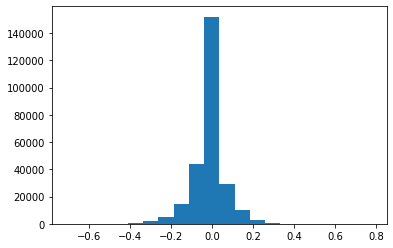

In [38]:
import numpy as np
import matplotlib.pyplot as plt
mean_change = np.mean(tcga_all[[c for c in tcga_all.columns if 'Tumor' in c]].values, axis=1) - np.mean(tcga_all[[c for c in tcga_all.columns if 'Normal' in c]].values, axis=1)
u.dp(['Number hyper (>0.1):', len(mean_change[mean_change > 0.1]), 'Mean hypo: (<-0.1)', len(mean_change[mean_change < -0.1])])
plt.hist(mean_change, bins=20)

--------------------------------------------------------------------------------
               Number hyper (>0.1):	6171	Mean hypo: (<-0.1)	1744	               
--------------------------------------------------------------------------------


(array([3.0000e+00, 5.0000e+00, 1.7000e+01, 5.7000e+01, 1.6800e+02,
        5.6600e+02, 1.9460e+03, 1.5834e+04, 7.3388e+04, 8.1530e+03,
        2.9100e+03, 9.8200e+02, 3.5100e+02, 9.2000e+01, 2.9000e+01,
        6.0000e+00, 5.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([-0.53426145, -0.46871949, -0.40317752, -0.33763556, -0.2720936 ,
        -0.20655163, -0.14100967, -0.07546771, -0.00992574,  0.05561622,
         0.12115818,  0.18670015,  0.25224211,  0.31778407,  0.38332604,
         0.448868  ,  0.51440996,  0.57995193,  0.64549389,  0.71103585,
         0.77657782]),
 <BarContainer object of 20 artists>)

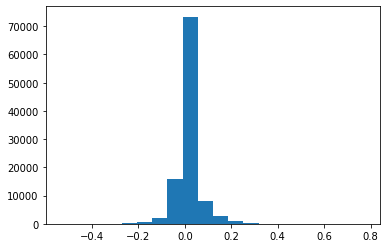

In [39]:
island = tcga_all[tcga_all['Relation_to_Island'] == 'Island']
mean_change = np.mean(island[[c for c in island.columns if 'Tumor' in c]].values, axis=1) - np.mean(island[[c for c in island.columns if 'Normal' in c]].values, axis=1)
u.dp(['Number hyper (>0.1):', len(mean_change[mean_change > 0.1]), 'Mean hypo: (<-0.1)', len(mean_change[mean_change < -0.1])])

plt.hist(mean_change, bins=20)

In [40]:
# We also want all the supplementary TCGA dataset methylation
tcga_all = tcga_all.fillna(0)
tcga_all["Locus"] = tcga_all.index
tcga_all.to_csv(f'{output_dir}meth_df_CPTAC-TCGA.csv', index=True)

In [41]:
tcga_all

,cpg_id,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,CpG_Normal_990080e4.9a47.4271.af1e.b34d7a973841_1,CpG_Normal_c0357545.fb85.4d3c.b653.54fe2d1f7d18_1,CpG_Normal_9e662d2e.69ba.47f4.8954.3647ce22dc18_1,CpG_Normal_ce33af25.6279.4e4a.8cfc.61d03c7eaf2f_1,...,CpG_Tumor_C3N.01261_1,CpG_Tumor_C3N.01361_1,CpG_Tumor_C3N.01522_1,CpG_Tumor_C3N.01524_1,CpG_Tumor_C3N.01646_1,CpG_Tumor_C3N.01648_1,CpG_Tumor_C3N.01649_1,CpG_Tumor_C3N.01651_1,CpG_Tumor_C3N.01808_1,Locus
cg00000029,chr16:53434200,0.585096,0.511813,0.489982,0.433942,0.362978,0.216424,0.444647,0.477372,0.456852,...,0.749333,0.419163,0.753077,0.770999,0.721516,0.544133,0.327466,0.503078,0.694581,cg00000029
cg00000236,chr8:42405776,0.890243,0.921860,0.893998,0.892156,0.900247,0.912149,0.914099,0.904354,0.923435,...,0.873052,0.893087,0.861024,0.906754,0.891277,0.847947,0.782197,0.874034,0.875275,cg00000236
cg00000289,chr14:68874422,0.787893,0.764004,0.747008,0.772496,0.819497,0.807987,0.833389,0.750756,0.504889,...,0.545539,0.671885,0.702027,0.689886,0.609681,0.610733,0.632943,0.623050,0.592563,cg00000289
cg00000292,chr16:28878779,0.486220,0.450472,0.550261,0.468594,0.417706,0.534426,0.434728,0.516065,0.500513,...,0.736726,0.403426,0.329949,0.526423,0.680651,0.690699,0.356444,0.678508,0.475394,cg00000292
cg00000321,chr8:41310283,0.383709,0.396987,0.409871,0.514956,0.495738,0.466870,0.470612,0.392804,0.449994,...,0.676859,0.419441,0.521325,0.583523,0.427041,0.294012,0.541033,0.445536,0.552439,cg00000321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.42405548R,chrX:42661352,0.049304,0.074080,0.054073,0.044249,0.063061,0.028285,0.036191,0.045584,0.104399,...,0.102222,0.095231,0.082132,0.074636,0.069788,0.107173,0.147709,0.103869,0.136737,ch.X.42405548R
ch.X.557489R,chrX:34358320,0.107342,0.137135,0.067283,0.061627,0.102144,0.061248,0.052358,0.081089,0.232619,...,0.156391,0.132571,0.076778,0.111397,0.097706,0.116886,0.171847,0.142111,0.153098,ch.X.557489R
ch.X.665616F,chrX:41219099,0.166893,0.181600,0.081570,0.074302,0.143562,0.060974,0.063811,0.102876,0.246511,...,0.178430,0.176420,0.100230,0.132132,0.195308,0.174261,0.244952,0.219125,0.247429,ch.X.665616F
ch.X.772253F,chrX:47204286,0.165270,0.190517,0.119149,0.110620,0.072773,0.076397,0.113159,0.103859,0.324864,...,0.089806,0.121446,0.090446,0.084857,0.117017,0.095262,0.270480,0.075017,0.289129,ch.X.772253F


In [42]:
# Also save the sample dataframe
merged_sample_df.to_csv(f'{output_dir}meth_sample_df_CPTAC-TCGA.csv', index=True)

## Get the mutation profile for the TCGA patients

We're interested in looking at PBRM1 mutations,so we want to make sure we also use normal data from
patients with the same mutations

In [43]:
# Want to make the sample df have the case ID so we can get the mutation information 
cases = [c.split('_')[-2] for c in tcga_normal.columns if 'KIRC' in c]
fileid_to_case = {c.split('_')[-1]:c.split('_')[-2] for c in tcga_normal.columns if 'KIRC' in c}

## Make a TCGA only sample frame

In [46]:
merged_sample_df['tcga_case_id'] = [fileid_to_case.get(c) for c in merged_sample_df.index.values]
tcga_sample_df = merged_sample_df[merged_sample_df['CondId'] == 0]

In [55]:
"""
We only want to do this once I keep it off by default :) 
"""
# Download mutation data
# Here we want to download the mutation files
from scidat.download import Download
from sciutil import SciUtil
tcga_dir = '../data/raw_downloads/TCGA/'
u = SciUtil()
mutation_dir = f'{tcga_dir}mutation/'

download_mutation = False
if download_mutation:

    download = Download(f'{tcga_dir}kidney_clinical.tsv', 
                        f'{tcga_dir}mutation/', 
                        f'{tcga_dir}mutation/', 
                        f'{tcga_dir}gdc-client', 
                        max_cnt=1)
    download.download_data_using_api(cases, 'mutation')
else:
    u.dp(["You said you already have your mutations downloaded, if this isn't the case you'll need to do this!"])


--------------------------------------------------------------------------------
You said you already have your mutations downloaded, if this isn't the case you'll need to do this!	
--------------------------------------------------------------------------------


In [56]:
mutation_files = os.listdir(mutation_dir)
gene_id = 'ssm.consequence.0.transcript.gene.symbol'

genes = ['MTOR', 'PTEN', 'VHL', 'PBRM1', 'KDM5C', 'CUBN', 'USH2A', 'SETD2', 'BAP1', 'MUC16', 'TTN']
for gene in genes:
    mutations = []
    change = 'ssm.genomic_dna_change'
    for f in mutation_files:
        df = pd.read_csv(f'{mutation_dir}{f}', sep='\t')
        df = df[df[gene_id] == gene]
        if len(df) > 0:
            mutations.append(df['ssm.genomic_dna_change'].values[0])
    print(gene, len(mutations), len(set(mutations)))

MTOR 8 8
PTEN 3 3
VHL 57 53
PBRM1 57 57
KDM5C 8 8
CUBN 5 5
USH2A 4 4
SETD2 15 15
BAP1 15 15
MUC16 12 12
TTN 28 28


VHL 57
PBRM1 57
TTN 28
SETD2 15
BAP1 15
MUC16 12
DST 12
KMT2C 9
MTOR 8
KDM5C 8
KMT2A 7
KIAA1549L 7
SPEN 7
ANK3 7
CSMD3 7
ZFPM2 6
BIRC6 6
DNAH9 6
PEG3 6
PDZD2 6
HMCN1 6
NEB 6
KAT6A 6
TP53 6
LRP2 6
STAG2 6
NF1 5
RANBP2 5
CNOT1 5
LYST 5
AKAP9 5
RPAP1 5
THBS1 5
VWF 5
AP000769.3 5
APOB 5
ABCA13 5
TRIOBP 5
CUBN 5
HSPA8 5
FCGBP 5
MTUS2 5
AHNAK2 5
COL6A3 5
TNR 5
UNC79 5
ZFHX4 5
LRP1 5
SYNE2 5
SCAF4 5
ATM 5
LRP1B 5
LAMA1 5
RALGAPA1 5
NRXN1 5
COL6A6 5
FBN2 5
PKHD1L1 5
CACNA1S 5
FAT4 5
SYNE1 5
XIRP2 4
SIPA1L2 4
HIVEP1 4
AKAP6 4
MAGEC1 4
HERC1 4
TENM1 4
USH2A 4
CCAR1 4
PTPRT 4
IGSF10 4
ERBB2 4
SAMD9 4
ZMYM2 4
PAN3 4
NPNT 4
SPHKAP 4
MACF1 4
ATP1B4 4
SEPTIN4 4
ARID1A 4
ANKHD1-EIF4EBP3 4
RYR3 4
KIF14 4
PXDN 4
DSCAM 4
N4BP2L2 4
DENND4A 4
GCC2 4
ZEB2 4
RFC1 4
MYH7 4
DOCK2 4
SULF1 4
CENPF 4
FBN1 4
PCNX1 4
TARBP1 4
DNAH2 4
GIGYF2 4
ARMC4 4
GON4L 4
FAT1 4
ROCK1 4
SDK2 4
RGS3 4
G3BP1 4
ZNF609 4
ABCC4 4
TEX13A 4
ADAMTS14 4
DNAH10 4
FZD10 4
UBN1 4
CPAMD8 4
KCNH7 4
TPR 4
LAMA2 4
NOTCH2 4
ALMS1 4
CSMD1 4
ALPK2

RPN2 1
DUSP19 1
USP22 1
PDE8A 1
OR5L2 1
C17orf49 1
AC090517.4 1
IGLC2 1
IP6K1 1
CBR4 1
MAOA 1
MARCHF7 1
IQCK 1
DAB1 1
STMN2 1
PFKFB1 1
FBXW10 1
EXOC6B 1
PPM1E 1
ABRAXAS2 1
SLC5A11 1
NOXRED1 1
RPL26L1 1
LRRC43 1
TOP3A 1
TP53I13 1
SPG7 1
POTEM 1
EPAS1 1
ABCE1 1
RWDD2B 1
CNGB3 1
CELF3 1
PRRX1 1
CDK2 1
CLSTN3 1
ERCC6L2 1
IQGAP1 1
ALAS2 1
MYBL1 1
KRTAP5-1 1
E2F3 1
TMEM94 1
AP2B1 1
CLK2 1
REG1B 1
AUH 1
OXA1L 1
GPR142 1
HLA-DPA1 1
TAS2R46 1
RAB36 1
PHTF2 1
AKIP1 1
ADAM20 1
BMP6 1
PUM2 1
ZNF507 1
PPP6R3 1
LHFPL1 1
STKLD1 1
FAM120AOS 1
ANKRD1 1
HBB 1
PIWIL3 1
KLK8 1
IFIH1 1
OR2C1 1
ADNP2 1
COL4A3 1
RECQL5 1
CLCA2 1
IPO13 1
ATAD2B 1
CRIP3 1
PLCG1 1
GRM3 1
SEMA6C 1
SLC12A9 1
KIF15 1
GATAD2A 1
NCAM1 1
CBX2 1
C11orf24 1
SLC35B3 1
ST6GALNAC2 1
FOSB 1
TAF15 1
VPS4B 1
EXOSC9 1
H3-5 1
COPS7B 1
PHF23 1
ZNF185 1
ARNT2 1
GP1BA 1
DDX10 1
APBB3 1
OR1S1 1
GK 1
DDX5 1
SCAMP4 1
DUOX1 1
VEZF1 1
CDK6 1
TCOF1 1
MFSD1 1
RASL10B 1
SUCLG1 1
IL21 1
C20orf204 1
RUFY3 1
RAB9A 1
POMT2 1
RGL2 1
CAB39 1
FAM120A 1
TAAR6 1


INVS 1
MYT1 1
MAPK8IP3 1
L3HYPDH 1
CAMSAP2 1
TSPAN5 1
CPXCR1 1
ONECUT1 1
ATP6V0A2 1
TUBGCP5 1
IGKV2D-29 1
APPL2 1
UBXN10 1
BCL11A 1
PEPD 1
SLC11A1 1
BMP5 1
TRAFD1 1
MAGEB6B 1
AK2 1
RALGPS1 1
CXCL11 1
MFSD6L 1
TIMM50 1
SNORD115-23 1
ALS2CL 1
CCDC146 1
DIAPH2 1
RBM26 1
OLFM1 1
PLEKHG3 1
ZMYM1 1
CSPG4 1
OR7G1 1
OSBPL10 1
NANOS3 1
RGPD1 1
OR4K13 1
MBD5 1
RNF43 1
DDX39B 1
PBLD 1
LZTR1 1
SASH1 1
RALY 1
SPESP1 1
FOXR1 1
PPP1R9B 1
SLC38A11 1
POSTN 1
ACADS 1
VWA3B 1
SERINC1 1
IL25 1
ZMYM5 1
RORC 1
SYNRG 1
CCHCR1 1
PTPRA 1
PCARE 1
VAC14 1
UNC50 1
KBTBD2 1
PDIA6 1
DNHD1 1
GPR148 1
GPKOW 1
VAT1 1
CD2AP 1
HDX 1
SCARB1 1
ASXL1 1
ZSCAN1 1
TRIM48 1
GLT8D2 1
ZNF426 1
RMI1 1
SYNGR3 1
ME2 1
HIRA 1
CBL 1
DNASE2B 1
PREX2 1
CD63 1
OAS3 1
SLC9C1 1
SLC41A1 1
MARCKS 1
SLC17A5 1
DBH 1
TUBB4B 1
C10orf71 1
CTC1 1
PRPF6 1
PML 1
ATG3 1
APBB1 1
FER 1
GEMIN5 1
PYDC1 1
SLC13A5 1
VARS1 1
MID1 1
KBTBD8 1
ZNF354C 1
POLR3C 1
DGKZ 1
AP3B2 1
LIMA1 1
DCAF8 1
NOD1 1
ELANE 1
PRPSAP1 1
LRRFIP2 1
EML5 1
TERT 1
EEF1D 1
RAD52 1
ZD

CRYM 1
WNK4 1
NR3C1 1
BCLAF1 1
LCAT 1
ALPL 1
FRMPD2B 1
SLC15A3 1
NFYC 1
ELMOD3 1
ZNF200 1
RILP 1
SEC24A 1
MTCH1 1
ZNF670 1
NDN 1
DIP2A 1
NT5C3A 1
ENTPD5 1
PPHLN1 1
CDC20 1
OR2F1 1
TMEM183B 1
TOMM40 1
DLAT 1
MAP7D3 1
PHF10 1
TAAR5 1
UBE2J1 1
SVOPL 1
RNF19B 1
TBL1Y 1
CLEC16A 1
DEFB116 1
LGALS8 1
TLDC2 1
PDE4A 1
TTBK2 1
MEF2D 1
MARCHF5 1
ACSL6 1
RAB26 1
DENND2C 1
GRM1 1
HS3ST2 1
PSMA4 1
SHROOM3 1
KIF24 1
VIPAS39 1
MEIS1 1
SLC4A8 1
SLC5A4 1
UBA5 1
CPNE7 1
CDK5RAP2 1
GRHL3 1
SLC27A1 1
KLHL5 1
TDRD9 1
TRPV4 1
TRAV26-1 1
ATG4A 1
NXPH3 1
MPPED2 1
ARID5A 1
OR2T4 1
TOP3B 1
EIF2B1 1
SCRN1 1
CENPW 1
ZNF280D 1
BBS2 1
SMARCAL1 1
AGO3 1
MRC2 1
RPL3 1
NAALAD2 1
ZBTB12 1
PCDHGA8 1
FAM222B 1
P2RX1 1
INSL6 1
ACOT9 1
TRIM28 1
ZNF211 1
MYT1L 1
IFNA21 1
IRX5 1
ZNF765 1
GTDC1 1
PSENEN 1
XYLT1 1
CDH16 1
NR5A2 1
SPSB3 1
IGHG3 1
LUZP1 1
PIGR 1
EPHA2 1
SMIM8 1
KLK13 1
NUP37 1
METTL3 1
PRKAG2 1
EMC2 1
PPP1R13L 1
ACVR1B 1
TMPRSS11F 1
CEMIP2 1
SDSL 1
NGEF 1
BCORL1 1
PHLPP2 1
GIPC3 1
LRRC66 1
ZKSCAN3 1
PDP2 1
RIN1 1

Text(0.5, 1.0, 'Number of mutations per case (if gene has 5 or more cases)')

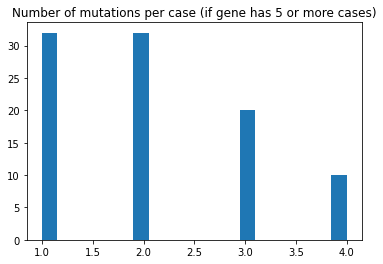

In [57]:
from scidat.api import API, APIException
import matplotlib.pyplot as plt

gdc_client = f'{tcga_dir}./gdc-client'
sample_file = f'{tcga_dir}gdc_sample_sheet.2021-05-03.tsv'
manifest_file = f'{tcga_dir}gdc_manifest_20210503_065756.txt'
annotation_file = f'{supp_dir}hsapiens_gene_ensembl-GRCh38.p13.csv'
clinical_file = f'{tcga_dir}clinical.cart.2021-05-03/clinical.tsv'

api = API(manifest_file, gdc_client, clinical_file, sample_file, data_dir, data_dir, annotation_file,
                            max_cnt=10, requires_lst=['counts'])

api.build_mutation_df(mutation_dir)

# Now we want to build a dictionary with mutations and cases.
filter_col = 'ssm.consequence.0.transcript.gene.symbol'
genes_with_mutations = api.get_mutation_values_on_filter('ssm.consequence.0.transcript.gene.symbol', [''], 'ssm.consequence.0.transcript.gene.symbol')

# Now for each gene we want to count the patients with mutations
cases_w_mutations = {}
for g in genes_with_mutations:
    cases = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    cases_w_mutations[g] = cases


# Sort keys by the genes with most mutations
sorted_genes_w_mutations = sorted(cases_w_mutations, key=lambda k: len(cases_w_mutations[k]), reverse=True)

# Print these out!
for g in sorted_genes_w_mutations:
    print(g, len(cases_w_mutations[g]))
    
case_to_mutation = {}
for gene in cases_w_mutations:
    if len(cases_w_mutations[gene]) > 10:
        for c in cases_w_mutations[gene]:
            if case_to_mutation.get(c):
                case_to_mutation[c].append(gene)
            else:
                case_to_mutation[c] = [gene]
                
# Check how many patients only have one mutation
number_mutations = []
for c in case_to_mutation:
    number_mutations.append(len(case_to_mutation[c]))
    
plt.hist(number_mutations, bins=20)
plt.title("Number of mutations per case (if gene has 5 or more cases)")

In [58]:
vhl_and_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' in v]
vhl_no_ttn = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'TTN' not in v]
vhl_and_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' in v]
vhl_no_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v]
pbrm1_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'PBRM1' in v]
vhl = [c for c, v in case_to_mutation.items() if 'VHL' in v and 'PBRM1' not in v and 'TTN' not in v]
ttn_no_vhl = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v]
vhl_ttn_pbrm1 = [c for c, v in case_to_mutation.items() if 'VHL' not in v and 'TTN' in v and 'PBRM1' in v]

In [59]:
pbrm1 = [c for c, v in case_to_mutation.items() if 'PBRM1' in v]
bap1 = [c for c, v in case_to_mutation.items() if 'BAP1' in v]
overlap = list(set(bap1) & set(pbrm1)) # Interesting! 
print(overlap) # T

['TCGA-B0-5097', 'TCGA-B0-5096', 'TCGA-B0-5107', 'TCGA-B0-4842', 'TCGA-CZ-5470', 'TCGA-CJ-4923']


In [60]:
## Finally let's add a column to our clinical DF for each of the mutations
genes_of_interest = ['MTOR', 'VHL', 'SETD2', 'PBRM1', 'KDM5C', 'TTN', 'BAP1']
mutations_to_cases = {}
all_cases_w_muts = []
for g in genes_of_interest:
    mutations_to_cases[g] = api.get_mutation_values_on_filter('case_id', [g], filter_col, exact=True)
    all_cases_w_muts += mutations_to_cases[g]

for g in genes_of_interest:
    mutation_col = []
    for case in tcga_sample_df['tcga_case_id'].values:
        if case in mutations_to_cases[g]:
            mutation_col.append(1) # has mutation
        else:
            mutation_col.append(0)
    tcga_sample_df[f'{g}_mutation'] = mutation_col
tcga_sample_df.to_csv(f'{output_dir}clinical_TCGA_13052022.csv', index=False)

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [61]:
tcga_sample_df

,SampleId,CondId,CondName,SafeCases,FullLabel,TumorStage,gender,RaceGrouped,AgeGrouped,tcga_case_id,MTOR_mutation,VHL_mutation,SETD2_mutation,PBRM1_mutation,KDM5C_mutation,TTN_mutation,BAP1_mutation
case,,,,,,,,,,,,,,,,,
db01e359-10a7-48c0-a742-656183e60ba8,db01e359-10a7-48c0-a742-656183e60ba8_Normal,0,Normal,db01e359.10a7.48c0.a742.656183e60ba8,CpG_Normal_db01e359.10a7.48c0.a742.656183e60ba8_1,Stage II,Male,White,old,TCGA-BP-5199,0,0,0,0,0,0,0
03c62ae5-662b-493b-b7b9-1bdd1cfafb5d,03c62ae5-662b-493b-b7b9-1bdd1cfafb5d_Normal,0,Normal,03c62ae5.662b.493b.b7b9.1bdd1cfafb5d,CpG_Normal_03c62ae5.662b.493b.b7b9.1bdd1cfafb5d_1,Stage III,Male,Blackorafricanamerican,middle,TCGA-CJ-4882,0,0,1,0,0,1,1
6942780c-b6c7-4534-b9b7-feda9cd04ecc,6942780c-b6c7-4534-b9b7-feda9cd04ecc_Normal,0,Normal,6942780c.b6c7.4534.b9b7.feda9cd04ecc,CpG_Normal_6942780c.b6c7.4534.b9b7.feda9cd04ecc_1,Stage II,Female,White,old,TCGA-B0-4852,0,0,0,0,0,0,0
ed7f6372-d820-43b9-bafa-7d83be8f66ec,ed7f6372-d820-43b9-bafa-7d83be8f66ec_Normal,0,Normal,ed7f6372.d820.43b9.bafa.7d83be8f66ec,CpG_Normal_ed7f6372.d820.43b9.bafa.7d83be8f66ec_1,Stage I,Female,White,old,TCGA-CZ-4859,0,1,0,0,0,1,0
c474cee0-1117-4576-9e44-17938be10ca5,c474cee0-1117-4576-9e44-17938be10ca5_Normal,0,Normal,c474cee0.1117.4576.9e44.17938be10ca5,CpG_Normal_c474cee0.1117.4576.9e44.17938be10ca5_1,Stage I,Male,White,middle,TCGA-BP-5170,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f29b6c8c-d713-42ad-9b90-e556df9b05cd,f29b6c8c-d713-42ad-9b90-e556df9b05cd_Normal,0,Normal,f29b6c8c.d713.42ad.9b90.e556df9b05cd,CpG_Normal_f29b6c8c.d713.42ad.9b90.e556df9b05cd_1,Stage III,Male,White,middle,TCGA-CZ-5458,0,1,0,0,0,0,0
cb371398-ee48-4665-8089-26229c5b2cf0,cb371398-ee48-4665-8089-26229c5b2cf0_Normal,0,Normal,cb371398.ee48.4665.8089.26229c5b2cf0,CpG_Normal_cb371398.ee48.4665.8089.26229c5b2cf0_1,Stage IV,Male,White,old,TCGA-CZ-5464,0,0,0,0,0,0,0
ac092a8e-80af-4589-8bb8-d86427b398ca,ac092a8e-80af-4589-8bb8-d86427b398ca_Normal,0,Normal,ac092a8e.80af.4589.8bb8.d86427b398ca,CpG_Normal_ac092a8e.80af.4589.8bb8.d86427b398ca_1,Stage I,Male,Blackorafricanamerican,middle,TCGA-A3-3376,0,0,0,0,0,0,0
